#### **Ejercicio:** Ejercicios sobre tuberías

**Elaborado por:** Fabian Villarreal Sosa

Tu tarea es hacer el ejercicio KNN (K-Nearest Neighbors) que completaste en la semana 5, ahora usando tuberías. Crea dos tuberías para unir el escalamiento y la regresión, y el escalamiento y la clasificación para las dos tareas principales:

La primera tarea es usar el conjunto de datos de abalon para predecir la edad de abalone según las medidas corporales usando KNN. Este es el problema de regresión. La segunda tarea es utilizar el conjunto de datos de abalone para predecir el sexo de acuerdo a sus características.  Asegúrate de usar una tubería para ambas.

El conjunto de datos está aquí: https://archive.ics.uci.edu/ml/datasets/abalone

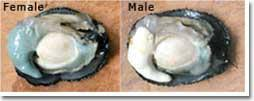

Después de que hayas completado las dos tareas, responde las siguientes preguntas. 

* ¿Por qué querrías ocupar una tubería para KNN?
* ¿Para qué otros modelos o tareas sería útil usar una tubería?

In [161]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from google.colab import drive

In [162]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

In [164]:
# Cargar datos
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 
                'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df=pd.read_csv('abalone.data', names=column_names)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [165]:
df.shape
# Se tienen 4,177 registros

(4177, 9)

In [166]:
# Valores perdidos
columns_nans = df.columns[df.isna().any()]
columns_nans

Index([], dtype='object')

In [167]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [168]:
df['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [169]:
# Cambiar 'sex' a variable categorica
df['sex']=df['sex'].map({'M': 0,
                         'F': 1,
                         'I': 2})

In [170]:
# Variables categoricas
categories = ['sex']

for cat in categories:
  df[cat] = df[cat].astype('category')

In [171]:
# Volver dummies
df1 = pd.get_dummies(df)

In [172]:
df1.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_0,sex_1,sex_2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


**1 Predecir la edad del abulón a partir de mediciones físicas utilizando KNN**

In [173]:
# Matriz de variables explicativas y variable dependiente
X1_var = df1.drop(['rings', 'sex_0', 'sex_1', 'sex_2'], axis = 1).columns
X1 = df1.loc[:, X1_var]

y1 = df1['rings'].values

print(X1.shape)
print(y1.shape)

(4177, 7)
(4177,)


In [174]:
# Dividir datos entre conjunto de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 2731)

In [175]:
# Escalar datos
scaler = StandardScaler()
X1_train_sc = scaler.fit_transform(X1_train)
X1_test_sc = scaler.transform(X1_test)

In [176]:
# Se utiliza la funcion 'GridSearchCV' de scikit-learn para determinar la cantidad de vecinos optimos.
# Adicionalmente, el uso de pesos uniformes a cada observacion puede no ser apropiado, debido a que no considera la influencia de la distancia de las observaciones
# Por tal motivo, tambien se implementa un peso basado en la distancia

from sklearn.model_selection import GridSearchCV

np.random.seed(2731) # Semilla

# Modelo
knn_reg = KNeighborsRegressor()

# Parametros a evaluar en la funcion 'GridSearchCV'
parameters = {'n_neighbors': range(2, 40, 1), # Probar cantidad de vecinos de 2 a 40
              'weights': ['uniform', 'distance']} # Pesos a considerar

# Determinacion y ejecucion del modelo
gridsearch_knn = GridSearchCV(knn_reg, parameters, cv = 10)
gridsearch_knn.fit(X1_train_sc, y1_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [177]:
# Resultado del modelo
gridsearch_knn.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [178]:
# Regresion KNeighborsRegressor
k_opt = gridsearch_knn.best_params_['n_neighbors']
w_opt = gridsearch_knn.best_params_['weights']

In [179]:
# Crear tuberia para escalado y regresion KNN
pipe1 = make_pipeline(StandardScaler(), 
                     KNeighborsRegressor(n_neighbors = k_opt, weights = w_opt))

pipe1.fit(X1_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=25, weights='distance'))])

In [180]:
# Evaluar modelo
print('Train accuracy:', pipe1.score(X1_train, y1_train))
print('Test accuracy:', pipe1.score(X1_test, y1_test))

Train accuracy: 1.0
Test accuracy: 0.5352929361588132


**2 Predecir el sexo a partir de sus características**

In [181]:
df2 = df.copy()

In [182]:
# Matriz de variables explicativas y variable dependiente
X2_var = df2.drop(['sex'], axis = 1).columns
X2 = df2.loc[:, X2_var]

y2 = df2['sex'].values

print(X2.shape)
print(y2.shape)

(4177, 8)
(4177,)


In [183]:
# Dividir datos entre conjunto de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 2731)

In [184]:
# Escalar datos
scaler = StandardScaler()
X2_train_sc = scaler.fit_transform(X2_train)
X2_test_sc = scaler.transform(X2_test)

In [185]:
# Se utiliza la funcion 'GridSearchCV' de scikit-learn para determinar la cantidad de vecinos optimos.
# Adicionalmente, el uso de pesos uniformes a cada observacion puede no ser apropiado, debido a que no considera la influencia de la distancia de las observaciones
# Por tal motivo, tambien se implementa un peso basado en la distancia

np.random.seed(2731) # Semilla

# Modelo
knn_class = KNeighborsClassifier()

# Parametros a evaluar en la funcion 'GridSearchCV'
parameters = {'n_neighbors': range(2, 40, 1), # Probar cantidad de vecinos de 2 a 40
              'weights': ['uniform', 'distance']} # Pesos a considerar

# Determinacion y ejecucion del modelo
gridsearch_knn = GridSearchCV(knn_class, parameters, cv = 10)
gridsearch_knn.fit(X2_train_sc, y2_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [186]:
# Resultado del modelo
gridsearch_knn.best_params_

{'n_neighbors': 26, 'weights': 'uniform'}

In [187]:
# Regresion KNeighborsRegressor
k_opt = gridsearch_knn.best_params_['n_neighbors']
w_opt = gridsearch_knn.best_params_['weights']

In [188]:
# Crear tuberia para escalado y regresion KNN
pipe2 = make_pipeline(StandardScaler(), 
                     KNeighborsClassifier(n_neighbors = k_opt, weights = w_opt))

pipe2.fit(X2_train, y2_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=26))])

In [189]:
# Evaluar modelo
print('Train accuracy:', pipe2.score(X2_train, y2_train))
print('Test accuracy:', pipe2.score(X2_test, y2_test))

Train accuracy: 0.603448275862069
Test accuracy: 0.5492822966507177
